In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
train_100 = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/leakage_dataset_train_100.csv")
train_100.head()

,y1,y2,mfc1,mfc2,mfc3,mfc4
0,-0.715718,0.312583,0.415256,0.173618,0.149738,0.261389
1,-0.883979,-0.962843,0.091696,0.059517,0.094725,0.754062
2,0.975897,0.006466,0.152927,0.328326,0.335973,0.182774
3,-0.528651,-0.702103,0.161398,0.125514,0.182725,0.530363
4,-0.761698,0.218907,0.380688,0.160163,0.168037,0.291112


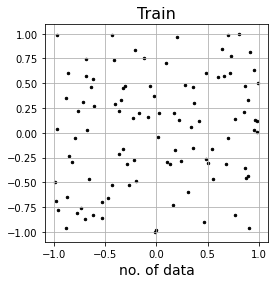

In [3]:
fig, ax = plt.subplots()

x = train_100['y1']
y = train_100['y2']

ax.scatter(x, y, color='black', marker='o',s=6,linewidths=1)
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_title('Train', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()

In [4]:
train_1000 = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/leakage_dataset_train_1000.csv")
train_1000.head()

,y1,y2,mfc1,mfc2,mfc3,mfc4
0,-0.415261,0.014355,0.292939,0.200913,0.179114,0.327034
1,-0.067510,0.823864,0.331997,0.292966,0.169223,0.205814
2,-0.414509,-0.044448,0.267616,0.188200,0.199169,0.345015
3,-0.692025,0.147275,0.363582,0.182521,0.165669,0.288228
4,0.776795,0.584189,0.142597,0.536641,0.146298,0.174463


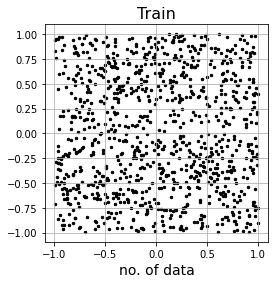

In [5]:
fig, ax = plt.subplots()

x = train_1000['y1']
y = train_1000['y2']

ax.scatter(x, y, color='black', marker='o',s=6,linewidths=1)
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_title('Train', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()

In [6]:
train_v = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/leakage_dataset_validation_1000.csv")
train_v.head()

,y1,y2,mfc1,mfc2,mfc3,mfc4
0,-0.783673,0.115504,0.365105,0.187124,0.174338,0.273434
1,-0.513497,-0.251715,0.232170,0.182380,0.209652,0.375799
2,-0.434164,-0.864151,0.156413,0.138725,0.189124,0.515737
3,-0.765644,0.189038,0.385778,0.174589,0.160180,0.279453
4,0.595703,0.040648,0.195498,0.321794,0.287587,0.195121


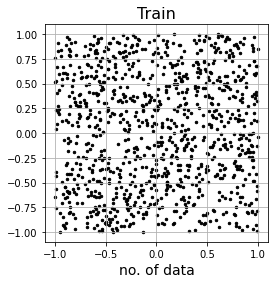

In [7]:
fig, ax = plt.subplots()

x = train_v['y1']
y = train_v['y2']

ax.scatter(x, y, color='black', marker='o',s=6,linewidths=1)
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_title('Train', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()

In [8]:
X_train_100 = train_100.drop(["y1", "y2"], axis = 1)
Y_train_100 = train_100[["y1", "y2"]]

In [9]:
X_train_1000 = train_1000.drop(["y1", "y2"], axis = 1)
Y_train_1000 = train_1000[['y1', 'y2']]

In [10]:
X_val = train_v.drop(["y1", "y2"], axis = 1)
Y_val = train_v[['y1', 'y2']]

In [11]:
model_100 = Sequential()
model_100.add(Dense(64, input_dim = 4, activation ='relu'))
model_100.add(Dense(32, activation='relu'))
model_100.add(Dense(16, activation='relu'))
model_100.add(Dense(8, activation='relu'))
model_100.add(Dense(2, activation='sigmoid'))

In [12]:
model_100.compile(loss = 'mean_squared_error', optimizer = Adam(), metrics = ['accuracy'])

In [13]:
# from eiffel2 import builder
# builder([4, 64, 32, 16, 8, 2])

In [14]:
model_100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 3,082
Trainable params: 3,082
Non-trainable params: 0
_________________________________________________________________


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_100=scaler.fit_transform(X_train_100)

In [16]:
model_history_100 = model_100.fit(X_train_100, Y_train_100, epochs = 50, batch_size = 20, validation_data = (X_val, Y_val))

Epoch 1/50
5/5 [==============================] - 1s 88ms/step - loss: 0.6005 - accuracy: 0.7900 - val_loss: 0.5748 - val_accuracy: 0.6580
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5803 - accuracy: 0.8900 - val_loss: 0.5682 - val_accuracy: 0.8110
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5675 - accuracy: 0.9300 - val_loss: 0.5638 - val_accuracy: 0.6460
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5562 - accuracy: 0.9200 - val_loss: 0.5601 - val_accuracy: 0.6270
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 0.5465 - accuracy: 0.9000 - val_loss: 0.5560 - val_accuracy: 0.6290
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5358 - accuracy: 0.8900 - val_loss: 0.5515 - val_accuracy: 0.6420
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5249 - accuracy: 0.8800 - val_loss: 0.5463 - val_accuracy: 0.6590
Epoch 8/50
5/5 [===========

In [17]:
model_1000 = Sequential()
model_1000.add(Dense(64, input_dim = 4, activation ='relu'))
model_1000.add(Dense(32, activation='relu'))
model_1000.add(Dense(16, activation='relu'))
model_1000.add(Dense(8, activation='relu'))
model_1000.add(Dense(2, activation='sigmoid'))

In [18]:
model_1000.compile(loss = 'mean_squared_error', optimizer = Adam(), metrics = ['accuracy'])

In [19]:
X_train_1000=scaler.fit_transform(X_train_1000)

In [20]:
model_history_1000 = model_1000.fit(X_train_1000, Y_train_1000, epochs = 50, batch_size = 20, validation_data = (X_val, Y_val))

Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 0.4916 - accuracy: 0.7770 - val_loss: 0.4999 - val_accuracy: 0.8570
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.8880 - val_loss: 0.3578 - val_accuracy: 0.7190
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.8940 - val_loss: 0.2904 - val_accuracy: 0.7330
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.8910 - val_loss: 0.2769 - val_accuracy: 0.7330
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.8920 - val_loss: 0.2731 - val_accuracy: 0.7190
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9010 - val_loss: 0.2719 - val_accuracy: 0.7680
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.8980 - val_loss: 0.2729 - val_accuracy: 0.7280
Epoch 8/50
50/50 [==

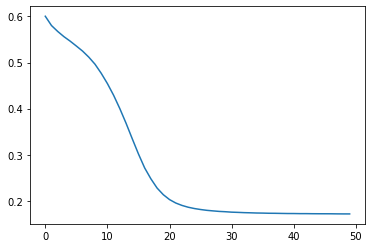

In [21]:
plt.plot(model_history_100.history["loss"])

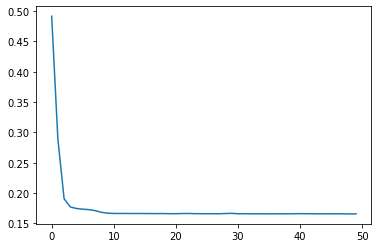

In [22]:
plt.plot(model_history_1000.history["loss"])

## Augmentation Part

In [23]:
# First rotation of 90 deg...
train100_rot_90deg=train_100.assign(y1=train_100['y2'],
                       y2=train_100['y1']*-1,
                       mfc1=train_100['mfc4'],
                       mfc2=train_100['mfc1'],
                       mfc3=train_100['mfc2'],
                       mfc4=train_100['mfc3'])

In [24]:
# deg 180 rotate => y1=-y1, y2=-y2 wrt original
train100_rot_180deg=train_100.assign(y1=train_100['y1']*-1,
                       y2=train_100['y2']*-1,
                       mfc1=train_100['mfc3'],
                       mfc2=train_100['mfc4'],
                       mfc3=train_100['mfc1'],
                       mfc4=train_100['mfc2'])

In [25]:
# rotate 270deg => y1=-y2, y2=y1
train100_rot_270deg=train_100.assign(y1=train_100['y2']*-1,
                       y2=train_100['y1'],
                       mfc1=train_100['mfc2'],
                       mfc2=train_100['mfc3'],
                       mfc3=train_100['mfc4'],
                       mfc4=train_100['mfc1'])

In [26]:
train100_flip=train_100.assign(y1=train_100['y1']*-1,
                       y2=train_100['y2'],
                       mfc1=train_100['mfc2'],
                       mfc2=train_100['mfc1'],
                       mfc3=train_100['mfc4'],
                       mfc4=train_100['mfc3'])

In [27]:
train100_rot90_flip=train100_rot_90deg.assign(y1=train100_rot_90deg['y1']*-1,
                       y2=train100_rot_90deg['y2'],
                       mfc1=train100_rot_90deg['mfc2'],
                       mfc2=train100_rot_90deg['mfc1'],
                       mfc3=train100_rot_90deg['mfc4'],
                       mfc4=train100_rot_90deg['mfc3'])

In [28]:
train100_rot180_flip=train100_rot_180deg.assign(y1=train100_rot_180deg['y1']*-1,
                       y2=train100_rot_180deg['y2'],
                       mfc1=train100_rot_180deg['mfc2'],
                       mfc2=train100_rot_180deg['mfc1'],
                       mfc3=train100_rot_180deg['mfc4'],
                       mfc4=train100_rot_180deg['mfc3'])

In [29]:
train100_rot270_flip=train100_rot_270deg.assign(y1=train100_rot_270deg['y1']*-1,
                       y2=train100_rot_270deg['y2'],
                       mfc1=train100_rot_270deg['mfc2'],
                       mfc2=train100_rot_270deg['mfc1'],
                       mfc3=train100_rot_270deg['mfc4'],
                       mfc4=train100_rot_270deg['mfc3'])

In [30]:
training_aug_100=pd.concat([train_100,train100_rot_90deg,train100_rot_180deg,train100_rot_270deg,train100_flip,train100_rot90_flip,train100_rot180_flip,train100_rot270_flip],axis=0)

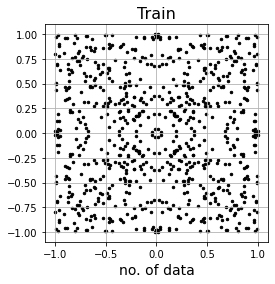

In [31]:
fig, ax = plt.subplots()

x = training_aug_100['y1']
y = training_aug_100['y2']

ax.scatter(x, y, color='black', marker='o',s=6,linewidths=1)
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_title('Train', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()

In [32]:
X_Train_aug_100=training_aug_100.drop(['y1','y2'],axis=1)
Y_Train_aug_100 = training_aug_100[['y1', 'y2']]

In [33]:
X_Train_aug_100=scaler.fit_transform(X_Train_aug_100)

In [34]:
model_hist_aug_100=model_100.fit(X_Train_aug_100,Y_Train_aug_100,epochs =50,batch_size=20, verbose=1)

Epoch 1/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1837 - accuracy: 0.8913
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.8788
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.8850
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.8850
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.8838
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.8925
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.8888
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.8863
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.8875
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.8975
Epoch 11/50
40/40 [

For 1000 datasets

In [35]:
# First rotation of 90 deg...
train1000_rot_90deg=train_1000.assign(y1=train_1000['y2'],
                       y2=train_1000['y1']*-1,
                       mfc1=train_1000['mfc4'],
                       mfc2=train_1000['mfc1'],
                       mfc3=train_1000['mfc2'],
                       mfc4=train_1000['mfc3'])

In [36]:
# deg 180 rotate => y1=-y1, y2=-y2 wrt original
train1000_rot_180deg=train_1000.assign(y1=train_1000['y1']*-1,
                       y2=train_1000['y2']*-1,
                       mfc1=train_1000['mfc3'],
                       mfc2=train_1000['mfc4'],
                       mfc3=train_1000['mfc1'],
                       mfc4=train_1000['mfc2'])

In [37]:
# rotate 270deg => y1=-y2, y2=y1
train1000_rot_270deg=train_1000.assign(y1=train_1000['y2']*-1,
                       y2=train_1000['y1'],
                       mfc1=train_1000['mfc2'],
                       mfc2=train_1000['mfc3'],
                       mfc3=train_1000['mfc4'],
                       mfc4=train_1000['mfc1'])

In [38]:
train1000_flip=train_1000.assign(y1=train_1000['y1']*-1,
                       y2=train_1000['y2'],
                       mfc1=train_1000['mfc2'],
                       mfc2=train_1000['mfc1'],
                       mfc3=train_1000['mfc4'],
                       mfc4=train_1000['mfc3'])

In [39]:
train1000_rot90_flip=train1000_rot_90deg.assign(y1=train1000_rot_90deg['y1']*-1,
                       y2=train1000_rot_90deg['y2'],
                       mfc1=train1000_rot_90deg['mfc2'],
                       mfc2=train1000_rot_90deg['mfc1'],
                       mfc3=train1000_rot_90deg['mfc4'],
                       mfc4=train1000_rot_90deg['mfc3'])

In [40]:
train1000_rot180_flip=train1000_rot_180deg.assign(y1=train1000_rot_180deg['y1']*-1,
                       y2=train1000_rot_180deg['y2'],
                       mfc1=train1000_rot_180deg['mfc2'],
                       mfc2=train1000_rot_180deg['mfc1'],
                       mfc3=train1000_rot_180deg['mfc4'],
                       mfc4=train1000_rot_180deg['mfc3'])

In [41]:
train1000_rot270_flip=train1000_rot_270deg.assign(y1=train1000_rot_270deg['y1']*-1,
                       y2=train1000_rot_270deg['y2'],
                       mfc1=train1000_rot_270deg['mfc2'],
                       mfc2=train1000_rot_270deg['mfc1'],
                       mfc3=train1000_rot_270deg['mfc4'],
                       mfc4=train1000_rot_270deg['mfc3'])

In [42]:
training_aug_1000=pd.concat([train_1000,train1000_rot_90deg,train1000_rot_180deg,train1000_rot_270deg,train1000_flip,train1000_rot90_flip,train1000_rot180_flip,train1000_rot270_flip],axis=0)

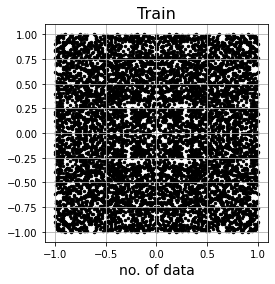

In [43]:
fig, ax = plt.subplots()

x = training_aug_1000['y1']
y = training_aug_1000['y2']

ax.scatter(x, y, color='black', marker='o',s=6,linewidths=1)
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_title('Train', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()

In [44]:
X_Train_aug_1000=training_aug_1000.drop(['y1','y2'],axis=1)
Y_Train_aug_1000 = training_aug_1000[['y1', 'y2']]

In [45]:
X_Train_aug_1000=scaler.fit_transform(X_Train_aug_1000)

In [46]:
model_hist_aug_1000=model_1000.fit(X_Train_aug_1000,Y_Train_aug_1000,epochs =50,batch_size=20, verbose=1)

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1782 - accuracy: 0.8766
Epoch 2/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1774 - accuracy: 0.8724
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1774 - accuracy: 0.8723
Epoch 4/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1772 - accuracy: 0.8730
Epoch 5/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1770 - accuracy: 0.8730
Epoch 6/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1770 - accuracy: 0.8761
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 0.1768 - accuracy: 0.8761
Epoch 8/50
400/400 [==============================] - 0s 1ms/step - loss: 0.1766 - accuracy: 0.8767
Epoch 9/50
400/400 [==============================] - 1s 1ms/step - loss: 0.1766 - accuracy: 0.8752
Epoch 10/50
400/400 [==============================] - 0s 1ms/step - loss: 0.1763 - accuracy: 0.8727

## Equivariant Model


In [47]:
class EquivariantHiddenLayer(keras.layers.Layer):
  def __init__(self,name =None,**kwargs):
    super(EquivariantHiddenLayer, self).__init__(name=name)
    
  def build(self, input_shape):
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.2)
    self.a = self.add_weight(name='w1', shape = (), initializer = initializer, trainable = True)
    self.b = self.add_weight(name='w2', shape = (), initializer = initializer, trainable = True)
    self.c = self.add_weight(name='w3', shape = (), initializer = initializer, trainable = True)

  def call(self, inputs):
    W1 = [[self.a, self.b, self.c, self.b],
          [self.b, self.a, self.b, self.c],
          [self.c, self.b, self.a, self.b],
          [self.b, self.c, self.b, self.a]]
    return tf.matmul(inputs, W1)

class EquivariantOutputLayer(keras.layers.Layer):
  def __init__(self,**kwargs):
    super(EquivariantOutputLayer, self).__init__()

  def build(self, input_shape):
    initializer = tf.random_normal_initializer(mean=0.0, stddev=0.2)
    self.d = self.add_weight(name='o1', shape = (), initializer = initializer, trainable = True)
        
  def call(self, inputs):
    first_term = self.d * tf.reduce_sum(inputs * [1, -1, -1, 1], axis=1, keepdims=True)
    second_term = self.d * tf.reduce_sum(inputs * [-1, -1, 1, 1], axis=1, keepdims=True)
    return tf.concat([first_term, second_term], axis=1)


In [48]:
model_equivariant_100 = tf.keras.Sequential()
model_equivariant_100.add(EquivariantHiddenLayer())
model_equivariant_100.add(EquivariantOutputLayer())
model_equivariant_100.compile(optimizer='adam', loss='mean_absolute_error', metrics = ["accuracy"])

In [49]:
model_equivariant_100.fit(X_train_100, Y_train_100, batch_size=30, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 2ms/step - loss: 0.8161 - accuracy: 0.0200
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.0200
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.0200
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7873 - accuracy: 0.0200
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7776 - accuracy: 0.0200
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.0200
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7599 - accuracy: 0.0200
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7510 - accuracy: 0.0200
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.0200
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7339 - accuracy: 0.0200
Epoch 11/50
4/4 [======================

In [50]:
import os
if os.path.exists('equil_v.h5'):
    os.remove('equil_v.h5')

model_equivariant_100.save('equil_v.h5')

In [51]:
from tensorflow import keras

new_model_equivariant_100 = keras.models.load_model('equil_v.h5', custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [52]:
Y_pred_equivariant_100 = new_model_equivariant_100.predict(X_val)
mse_equivariant_100 = np.mean(np.power(Y_val-Y_pred_equivariant_100, 2), axis=1)

32/32 [==============================] - 0s 905us/step


In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
mae_equivariant_100 = mean_absolute_error(Y_val, Y_pred_equivariant_100)

# Print the result
print(f'Mean Absolute Error: {mae_equivariant_100:.4f}')

Mean Absolute Error: 0.4991


In [55]:
mse_equivariant_100.mean()

0.3294192878181085

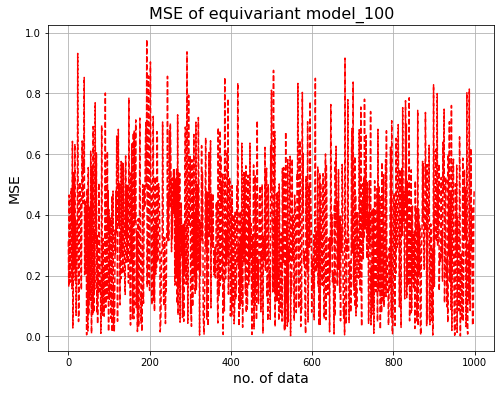

In [56]:
fig, ax = plt.subplots()

x = np.arange(len(mse_equivariant_100))
y = mse_equivariant_100

ax.plot(x, y, color='red', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of equivariant model_100', fontsize=16)
ax.grid(True)

fig.set_size_inches(8, 6)
plt.show()


In [57]:
model_equivariant_1000 = tf.keras.Sequential()
model_equivariant_1000.add(EquivariantHiddenLayer())
model_equivariant_1000.add(EquivariantOutputLayer())
model_equivariant_1000.compile(optimizer='adam', loss='mean_absolute_error', metrics = ["accuracy"])

In [58]:
model_equivariant_1000.fit(X_train_1000, Y_train_1000, batch_size=30, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 1ms/step - loss: 0.5784 - accuracy: 0.0560
Epoch 2/50
34/34 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.0660
Epoch 3/50
34/34 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.9440
Epoch 4/50
34/34 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.9440
Epoch 5/50
34/34 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.9440
Epoch 6/50
34/34 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.9440
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9440
Epoch 8/50
34/34 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9440
Epoch 9/50
34/34 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9440
Epoch 10/50
34/34 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9440
Epoch 11/50
34/34 [

In [59]:
model_equivariant_1000.save("model_equivariant_1000.h5")
new_model_equivariant_1000 = keras.models.load_model('model_equivariant_1000.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [60]:
model_equivariant_aug_100 = tf.keras.Sequential()
model_equivariant_aug_100.add(EquivariantHiddenLayer())
model_equivariant_aug_100.add(EquivariantOutputLayer())
model_equivariant_aug_100.compile(optimizer='adam', loss='mean_absolute_error', metrics = ["accuracy"])

In [61]:
Y_pred_equivariant_1000 = new_model_equivariant_1000.predict(X_val)
mse_equivariant_1000 = np.mean(np.power(Y_val-Y_pred_equivariant_1000, 2), axis=1)

32/32 [==============================] - 0s 894us/step


In [62]:
mae_equivariant_1000 = mean_absolute_error(Y_val, Y_pred_equivariant_1000)

# Print the result
print(f'Mean Absolute Error: {mae_equivariant_1000:.4f}')

Mean Absolute Error: 0.4378


In [63]:
print(mse_equivariant_1000.mean())
print(mae_equivariant_1000.mean())

0.25494269439718514
0.43776805130595514


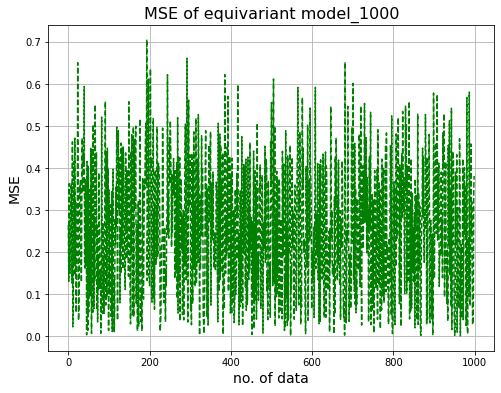

In [64]:
fig, ax = plt.subplots()

x = np.arange(len(mse_equivariant_1000))
y = mse_equivariant_1000

ax.plot(x, y, color='green', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of equivariant model_1000', fontsize=16)
ax.grid(True)

fig.set_size_inches(8, 6)
plt.show()


In [65]:
model_equivariant_aug_100.fit(X_Train_aug_100, Y_Train_aug_100, batch_size=20, epochs=50)

Epoch 1/50
40/40 [==============================] - 1s 1ms/step - loss: 0.5190 - accuracy: 0.3325
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.9100
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.9100
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.9100
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9100
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9100
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9100
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9100
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9100
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9100
Epoch 11/50
40/40 [

In [66]:
model_equivariant_aug_100.save("model_equivariant_100_augmented.h5")
new_model_equivariant_100_augmented = keras.models.load_model('model_equivariant_100_augmented.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [67]:
Y_pred_equivariant_100_augmented = new_model_equivariant_100_augmented.predict(X_val)
mse_equivariant_100_augmented = np.mean(np.power(Y_val-Y_pred_equivariant_100_augmented, 2), axis=1)

32/32 [==============================] - 0s 847us/step


In [68]:
mse_equivariant_100_augmented.mean()

0.2557892218969631

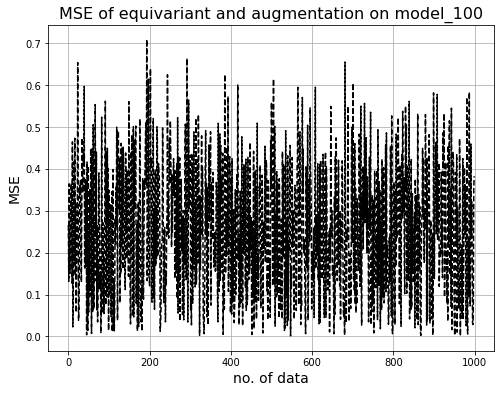

In [69]:
fig, ax = plt.subplots()

x = np.arange(len(mse_equivariant_100_augmented))
y = mse_equivariant_100_augmented

ax.plot(x, y, color='black', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of equivariant and augmentation on model_100', fontsize=16)
ax.grid(True)

fig.set_size_inches(8, 6)
plt.show()


In [70]:
model_equivariant_aug_1000 = tf.keras.Sequential()
model_equivariant_aug_1000.add(EquivariantHiddenLayer())
model_equivariant_aug_1000.add(EquivariantOutputLayer())
model_equivariant_aug_1000.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])

In [71]:
model_equivariant_aug_1000.fit(X_Train_aug_1000, Y_Train_aug_1000, batch_size=20, epochs=50)

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 0.3170 - accuracy: 0.5418
Epoch 2/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.8820
Epoch 3/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.8820
Epoch 4/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.8820
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.8820
Epoch 6/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.8820
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.8820
Epoch 8/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.8820
Epoch 9/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.8820
Epoch 10/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.8820

In [72]:
model_equivariant_aug_1000.save("model_equivariant_1000_augmented.h5")

In [73]:
new_model_equivariant_1000_augmented = keras.models.load_model('model_equivariant_1000_augmented.h5', 
                                                    custom_objects={'EquivariantHiddenLayer': EquivariantHiddenLayer, 'EquivariantOutputLayer': EquivariantOutputLayer})

In [74]:
Y_pred_equivariant_1000_augmented = new_model_equivariant_1000_augmented.predict(X_val)
mse_equivariant_1000_augmented = np.mean(np.power(Y_val-Y_pred_equivariant_1000_augmented, 2), axis=1)

32/32 [==============================] - 0s 834us/step


In [75]:
mse_equivariant_1000_augmented.mean()

0.2532334215257618

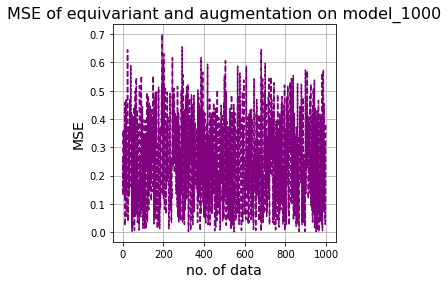

In [109]:
fig, ax = plt.subplots()

x = np.arange(len(mse_equivariant_1000_augmented))
y = mse_equivariant_1000_augmented

ax.plot(x, y, color='purple', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of equivariant and augmentation on model_1000', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()

## Hyperparameter Tuning

In [77]:
!pip install keras_tuner

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model_100 = Sequential()
    model_100.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_100.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_100.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model_100.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_100

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_100'
)

tuner.search(X_train_100, Y_train_100, epochs=10, validation_data=(X_val, Y_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("model_standard_100.h5")




INFO:tensorflow:Reloading Tuner from /tmp/kerastuner\model_100\tuner0.json
INFO:tensorflow:Oracle triggered exit


C:\Users\uddes\AppData\Local\Temp\ipykernel_27344\2883938399.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


32/32 [==============================] - 0s 2ms/step


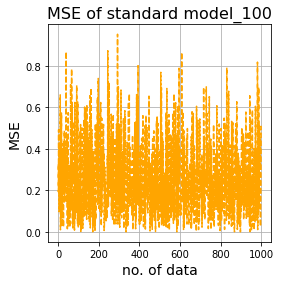

In [110]:
model_standard_100 = keras.models.load_model("model_standard_100.h5")
Y_pred_standard_100 = model_standard_100.predict(X_val)
mse_standard_100 = np.mean(np.power(Y_val-Y_pred_standard_100, 2), axis=1)

fig, ax = plt.subplots()

x = np.arange(len(mse_standard_100))
y = mse_standard_100

ax.plot(x, y, color='orange', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of standard model_100', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()


In [79]:
mse_standard_100.mean()

0.25355349888031653

In [80]:


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch



import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch

def build_model_1000(hp):
    model_1000 = Sequential()
    model_1000.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_1000.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model_1000.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_1000

tuner = RandomSearch(
    build_model_1000,
    objective='val_accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_1000'
)

tuner.search(X_train_1000, Y_train_1000, epochs=50, validation_data=(X_val, Y_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("model_standard_1000.h5")





INFO:tensorflow:Reloading Tuner from /tmp/kerastuner\model_1000\tuner0.json
INFO:tensorflow:Oracle triggered exit


32/32 [==============================] - 0s 1ms/step


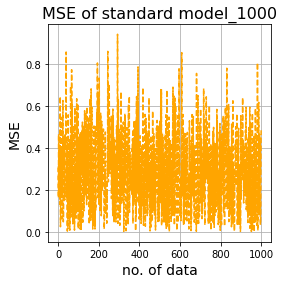

In [111]:
model_standard_1000 = keras.models.load_model("model_standard_1000.h5")
Y_pred_standard_1000 = model_standard_1000.predict(X_val)
mse_standard_1000 = np.mean(np.power(Y_val-Y_pred_standard_1000, 2), axis=1)

fig, ax = plt.subplots()

x = np.arange(len(mse_standard_1000))
y = mse_standard_1000

ax.plot(x, y, color='orange', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of standard model_1000', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()


In [82]:
mse_standard_1000.mean()

0.29135634558323614

In [83]:


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model_100 = Sequential()
    model_100.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_100.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_100.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_100.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model_100.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_100

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_100_augmented'
)

tuner.search(X_Train_aug_100, Y_Train_aug_100, epochs=50, validation_data=(X_val, Y_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("model_standard_100_augmented.h5")




INFO:tensorflow:Reloading Tuner from /tmp/kerastuner\model_100_augmented\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [84]:
new_model_standard_100_augmented = keras.models.load_model("model_standard_100_augmented.h5")

In [85]:
Y_pred_standard_100_augmented = new_model_standard_100_augmented.predict(X_val)
mse_standard_100_augmented = np.mean(np.power(Y_val-Y_pred_standard_100_augmented, 2), axis=1)

32/32 [==============================] - 0s 1ms/step


In [86]:
mse_standard_100_augmented.mean()

0.2803618335414568

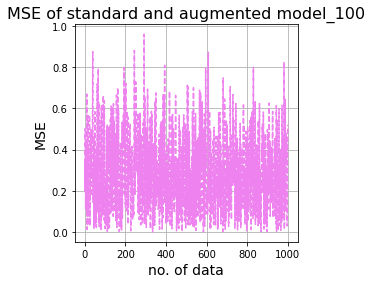

In [112]:
fig, ax = plt.subplots()

x = np.arange(len(mse_standard_100_augmented))
y = mse_standard_100_augmented

ax.plot(x, y, color='violet', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of standard and augmented model_100', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()


In [88]:



import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch

def build_model_1000(hp):
    model_1000 = Sequential()
    model_1000.add(Dense(hp.Int('input_units', min_value=32, max_value=256, step=32), input_dim = 4, activation ='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_1', min_value=32, max_value=256, step=32), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model_1000.add(Dense(hp.Int('hidden_units_3', min_value=8, max_value=64, step=8), activation='relu'))
    model_1000.add(Dense(2, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    model_1000.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model_1000

tuner = RandomSearch(
    build_model_1000,
    objective='val_accuracy',
    max_trials=5,
    directory='/tmp/kerastuner',
    project_name='model_1000_augmented'
)

tuner.search(X_Train_aug_1000, Y_Train_aug_1000, epochs=50, validation_data=(X_val, Y_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("model_standard_1000_augmented.h5")





INFO:tensorflow:Reloading Tuner from /tmp/kerastuner\model_1000_augmented\tuner0.json
INFO:tensorflow:Oracle triggered exit


32/32 [==============================] - 0s 1ms/step


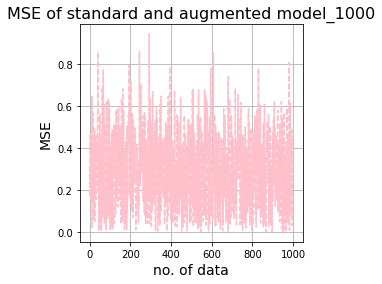

In [113]:
new_model_standard_1000_augmented = keras.models.load_model("model_standard_1000_augmented.h5")
Y_pred_standard_1000_augmented = new_model_standard_1000_augmented.predict(X_val)
mse_standard_1000_augmented = np.mean(np.power(Y_val-Y_pred_standard_1000_augmented, 2), axis=1)
fig, ax = plt.subplots()

x = np.arange(len(mse_standard_1000_augmented))
y = mse_standard_1000_augmented

ax.plot(x, y, color='pink', linestyle='--')
ax.set_xlabel('no. of data', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE of standard and augmented model_1000', fontsize=16)
ax.grid(True)

fig.set_size_inches(4, 4)
plt.show()


C:\Users\uddes\AppData\Local\Temp\ipykernel_27344\719327794.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Collection 1','Collection 1','Collection 2', 'Collection 3', 'Collection 4','Collection 5', 'Collection 6', 'Collection 7', 'Collection 8'],fontsize=8, rotation=30)


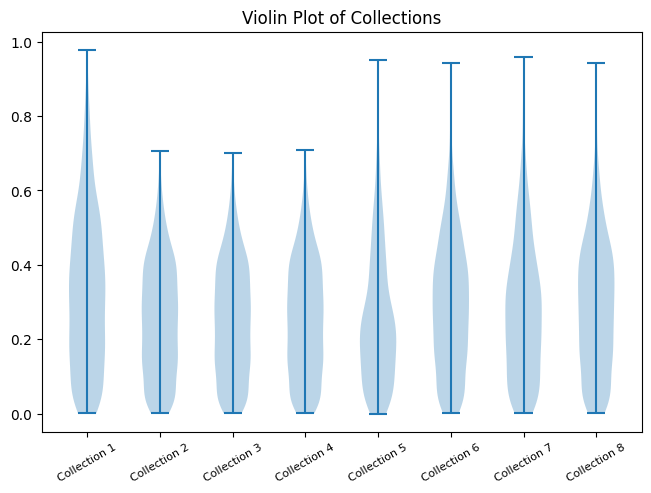

In [137]:

data_to_plot = [mse_equivariant_100,mse_equivariant_1000,mse_equivariant_1000_augmented,mse_equivariant_100_augmented,mse_standard_100,mse_standard_1000,mse_standard_100_augmented,mse_standard_1000_augmented]

fig = plt.figure(dpi=100)

# Create an axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['Collection 1','Collection 1','Collection 2', 'Collection 3', 'Collection 4','Collection 5', 'Collection 6', 'Collection 7', 'Collection 8'],fontsize=8, rotation=30)

# Add a title
ax.set_title('Violin Plot of Collections')
# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

In [90]:
mse_standard_1000_augmented.mean()

0.2917490906104184

Plotting and checking 

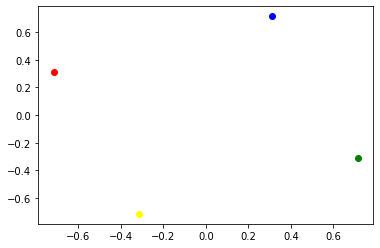

In [91]:
x1 = train_100['y1']
x2= train_100['y2']
x1_rot90=train100_rot_90deg['y1']
x2_rot90=train100_rot_90deg['y2']
x_90=x1_rot90[0]
y_90=x2_rot90[0]
x1_rot180=train100_rot_180deg['y1']
x2_rot180=train100_rot_180deg['y2']
x_180=x1_rot180[0]
y_180=x2_rot180[0]

x1_rot270=train100_rot_270deg['y1']
x2_rot270=train100_rot_270deg['y2']
x_270=x1_rot270[0]
y_270=x2_rot270[0]


x=x1[0]
y=x2[0]
fig, ax = plt.subplots()
ax.plot(x,
        y,
        color="red", 
        marker="o")

ax.plot(x_90, y_90,color="blue",marker="o")
ax.plot(x_270, y_270,color="yellow",marker="o")
ax.plot(x_180, y_180,color="green",marker="o")
plt.show()

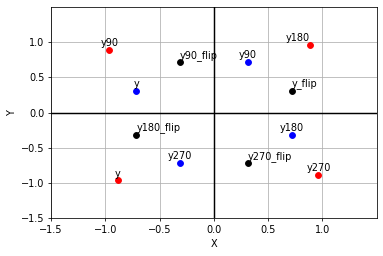

In [125]:
x1 = train_100['y1']
x2= train_100['y2']
x1_rot90=train100_rot_90deg['y1']
x2_rot90=train100_rot_90deg['y2']
x_90=x1_rot90[0]
y_90=x2_rot90[0]
x1_rot180=train100_rot_180deg['y1']
x2_rot180=train100_rot_180deg['y2']
x_180=x1_rot180[0]
y_180=x2_rot180[0]

x1_rot270=train100_rot_270deg['y1']
x2_rot270=train100_rot_270deg['y2']
x_270=x1_rot270[0]
y_270=x2_rot270[0]

x1_fl=train100_flip['y1']
x2_fl=train100_flip['y2']

x1_flip=x1_fl[0]
y1_flip=x2_fl[0]



x=x1[0]
y=x2[0]

x1_ = train_100['y1']
x2_= train_100['y2']
x1_rot90_=train100_rot_90deg['y1']
x2_rot90_=train100_rot_90deg['y2']
x_90_=x1_rot90_[1]
y_90_=x2_rot90_[1]
x1_rot180_=train100_rot_180deg['y1']
x2_rot180_=train100_rot_180deg['y2']
x_180_=x1_rot180_[1]
y_180_=x2_rot180_[1]
x1_180_flip=train100_rot180_flip['y1']
x2_180_flip=train100_rot180_flip['y2']

x_18_flip=x1_180_flip[0]
y_18_flip=x2_180_flip[0]



x1_90_=train100_rot90_flip['y1']
x2_90_=train100_rot90_flip['y2']
x_90_flip=x1_90_[1]
y_90_flip=x2_90_[1]
x1_90_flip=x1_90_[0]
y1_90_flip=x2_90_[0]

x1_rot270_=train100_rot_270deg['y1']
x2_rot270_=train100_rot_270deg['y2']
x_270_=x1_rot270_[1]
y_270_=x2_rot270_[1]
x1_270_flip=train100_rot270_flip['y1']
x2_270_flip=train100_rot270_flip['y2']
x_27_flip = x1_270_flip[0]
y_27_flip = x2_270_flip[0]

x_=x1_[1]
y_=x2_[1]







fig, ax = plt.subplots(dpi=70)
ax.plot(x, y, color="blue", marker="o",label='y')
#ax.plot(x_90_flip,y_90_flip , color="black", marker="o",label='y')
ax.plot(x_90, y_90, color="blue", marker="o",label='y90')
ax.plot(x_270, y_270, color="blue", marker="o",label='y270')
ax.plot(x_180, y_180, color="blue", marker="o",label='y180')
ax.plot(x1_90_flip, y1_90_flip, color="black", marker="o",label='y90_flip')
ax.plot(x1_flip, y1_flip, color="black", marker="o",label='y_flip')
ax.plot(x_, y_, color="red", marker="o",label='y')

ax.plot(x_90_, y_90_, color="red", marker="o",label='y90')
ax.plot(x_270_, y_270_, color="red", marker="o",label='y270')
ax.plot(x_180_, y_180_, color="red", marker="o",label='y180')
ax.plot(x_27_flip, y_27_flip, color="black", marker="o",label='y270_flip')
ax.plot(x_18_flip, y_18_flip, color="black", marker="o",label='y180_flip')
# Set x and y labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set x and y limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Set ticks
ax.set_xticks(np.arange(-1.5, 1.5, 0.5))
ax.set_yticks(np.arange(-1.5, 1.5, 0.5))

# Add grid lines
ax.grid(True)

# Set origin
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
label_offset = 0.1
ax.text(x, y+label_offset, 'y', ha='center', va='center', color='black')
ax.text(x_90, y_90+label_offset, 'y90', ha='center', va='center', color='black')
ax.text(x_270, y_270+label_offset, 'y270', ha='center', va='center', color='black')
ax.text(x_180, y_180+label_offset, 'y180', ha='center', va='center', color='black')
ax.text(x_, y_+label_offset, 'y', ha='center', va='center', color='black')
ax.text(x_90_, y_90_+label_offset, 'y90', ha='center', va='center', color='black')
ax.text(x_270_, y_270_+label_offset, 'y270', ha='center', va='center', color='black')
ax.text(x_180_, y_180_+label_offset, 'y180', ha='right', va='center', color='black')
#ax.text(x_90_flip, y_90_flip+label_offset, 'y90_flip', ha='left', va='center', color='black')
ax.text(x1_90_flip, y1_90_flip+label_offset, 'y90_flip', ha='left', va='center', color='black')
ax.text(x_27_flip, y_27_flip+label_offset, 'y270_flip', ha='left', va='center', color='black')
ax.text(x_18_flip, y_18_flip+label_offset, 'y180_flip', ha='left', va='center', color='black')
ax.text(x1_flip, y1_flip+label_offset, 'y_flip', ha='left', va='center', color='black')
plt.show()


In [93]:
#test_set = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/test_set_2.csv")
#test_set.head()

In [94]:
#y_pred_1 = model_equivariant_100.predict(test_set)

In [95]:
#test_set.shape

In [96]:
#y_pred_1.shape

In [97]:
#y_pred_1

In [98]:
#test_set_2 = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/test_set_1.csv")
#test_set_2.head()

In [99]:
#y_pred_2 = model_equivariant_100.predict(test_set_2)

In [100]:
#y_pred_2

In [101]:
#fig, ax = plt.subplots(figsize=(10,5), dpi=300)
#ax.plot(y_pred_1[0][0], y_pred_1[0][1], color="red", marker="o")
#ax.plot(y_pred_1[1][0], y_pred_1[1][1], color="red", marker="o")
#ax.plot(y_pred_1[2][0], y_pred_1[2][1], color="red", marker="o")
#ax.plot(y_pred_1[3][0], y_pred_1[3][1], color="red", marker="o")
#ax.plot(y_pred_1[4][0], y_pred_1[4][1], color="red", marker="o")
#ax.plot(y_pred_1[5][0], y_pred_1[5][1], color="red", marker="o")
#ax.plot(y_pred_1[6][0], y_pred_1[6][1], color="red", marker="o")
#for i in range(7):
# ax.plot(y_pred_1[i][0], y_pred_1[i][1], color="red", marker="o")
# ax.plot(y_pred_2[i][0], y_pred_2[i][1], color="blue", marker="o")
#ax.plot(y_pred_2[0][0], y_pred_1[0][1], color="blue", marker="o")
#ax.plot(y_pred_2[2][0], y_pred_1[2][1], color="blue", marker="o")
#ax.plot(y_pred_2[3][0], y_pred_1[3][1], color="blue", marker="o")
#ax.plot(y_pred_2[4][0], y_pred_1[4][1], color="blue", marker="o")
#ax.plot(y_pred_2[5][0], y_pred_1[5][1], color="blue", marker="o")
#ax.plot(y_pred_2[6][0], y_pred_1[6][1], color="blue", marker="o")
#ax.plot(y_pred_2[1][0], y_pred_1[1][1], color="blue", marker="o")


In [102]:
#plt.plot( y_pred_2,y_pred_1, color='blue', marker='o', markerfacecolor='blue', markersize=8)

In [103]:
import numpy as np

import pandas as pd

np.random.seed(1)  # for reproducibility

# generate data according to the constraints
n = 100  # number of data points
x1 = np.random.uniform(low=0.0, high=0.5, size=n)
x3 = 0.5 - x1
x2 = np.full(n, 0.25)
x4 = np.full(n, 0.25)

# create a DataFrame and save it as a CSV file
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})
data.to_csv('data.csv', index=False)


In [104]:
test_set_3 = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/data.csv")
test_set_3.head()

,x1,x2,x3,x4
0,0.208511,0.25,0.291489,0.25
1,0.360162,0.25,0.139838,0.25
2,0.000057,0.25,0.499943,0.25
3,0.151166,0.25,0.348834,0.25
4,0.073378,0.25,0.426622,0.25


In [105]:
np.random.seed(1)  # for reproducibility

# generate data according to the constraints
n = 100  # number of data points
x2 = np.random.uniform(low=0.0, high=0.5, size=n)
x4 = 0.5 - x2
x1 = np.full(n, 0.25)
x3 = np.full(n, 0.25)

# create a DataFrame and save it as a CSV file
data1 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4})
data1.to_csv('data1.csv', index=False)

In [106]:
test_set_4 = pd.read_csv("C:/TU Braunschweig/Sem_5/Fortgeschrittene/Final_project/data1.csv")
test_set_4.head()

,x1,x2,x3,x4
0,0.25,0.208511,0.25,0.291489
1,0.25,0.360162,0.25,0.139838
2,0.25,0.000057,0.25,0.499943
3,0.25,0.151166,0.25,0.348834
4,0.25,0.073378,0.25,0.426622


In [107]:
y_pred_3 = model_equivariant_100.predict(test_set_3)
y_pred_4 = model_equivariant_100.predict(test_set_4)

4/4 [==============================] - 0s 2ms/step


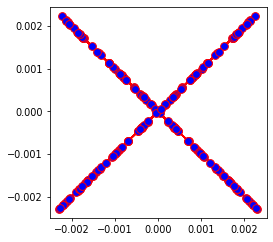

In [123]:
#plt.plot( y_pred_3,y_pred_4, color='red', marker='o', markerfacecolor='blue', markersize=8)
plt.figure(figsize=(4, 4),dpi=70)
plt.plot(y_pred_3, y_pred_4, color='red', marker='o', markerfacecolor='blue', markersize=8)
plt.show()